In [2]:
#Initial imports 
import numpy as np
import pandas as pd 
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell #Show all consecutive outputs
InteractiveShell.ast_node_interactivity = "all"

#Removes all unnecessary warnings by Python
import warnings
warnings.filterwarnings('ignore')

# Imports for better visualization

from collections import defaultdict
import scipy as sp
from matplotlib import rcParams
import matplotlib.cm as cm
import matplotlib as mpl

#colorbrewer2 Dark2 qualitative color table
dark2_colors = [(0.10588235294117647, 0.6196078431372549, 0.4666666666666667),
                (0.8509803921568627, 0.37254901960784315, 0.00784313725490196),
                (0.4588235294117647, 0.4392156862745098, 0.7019607843137254),
                (0.9058823529411765, 0.1607843137254902, 0.5411764705882353),
                (0.4, 0.6509803921568628, 0.11764705882352941),
                (0.9019607843137255, 0.6705882352941176, 0.00784313725490196),
                (0.6509803921568628, 0.4627450980392157, 0.11372549019607843)]

rcParams['figure.figsize'] = (14, 6)
rcParams['figure.dpi'] = 250
rcParams['axes.color_cycle'] = dark2_colors
rcParams['lines.linewidth'] = 3
rcParams['axes.facecolor'] = 'white'
rcParams['font.size'] = 25
rcParams['patch.edgecolor'] = 'white'
rcParams['patch.facecolor'] = dark2_colors[0]
rcParams['font.family'] = 'StixGeneral'

#Show all the columns 
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)



In [1]:
2+3

5

In [3]:
train = pd.read_csv('train.csv', parse_dates=True)
test = pd.read_csv('test.csv',parse_dates=True)

In [12]:
test.shape
train.shape

(266248, 6)

(881876, 8)

In [13]:
train.head()

,ID,Item_ID,Datetime,Category_3,Category_2,Category_1,Price,Number_Of_Sales
0,30495_20140101,30495,2014-01-01,0,2.0,90,165.123,1
1,30375_20140101,30375,2014-01-01,0,2.0,307,68.666,5
2,30011_20140101,30011,2014-01-01,0,3.0,67,253.314,2
3,30864_20140101,30864,2014-01-01,0,2.0,315,223.122,1
4,30780_20140101,30780,2014-01-01,1,2.0,132,28.750,1


In [14]:
train['Date'] = pd.to_datetime(train['Datetime'])
test['Date'] = pd.to_datetime(test['Datetime'])

In [15]:
# del train['Datetime']
# del test['Datetime']

In [16]:
train['dayw'] = train['Date'].dt.weekday_name
train['Tarikh'] = train['Date'].dt.day
train['Month'] = train['Date'].dt.month
train['Year'] = train['Date'].dt.year
test['Tarikh'] = test['Date'].dt.day
test['Month'] = test['Date'].dt.month
test['Year'] = test['Date'].dt.year
test['dayw'] = test['Date'].dt.weekday_name


In [19]:
train['proloss'] = train['Price']-train['Category_1']

In [27]:
train['Category_2'].value_counts()

2.0    227166
3.0    212388
1.0    140098
4.0    106903
5.0    103708
Name: Category_2, dtype: int64

In [29]:
train['Category_2'].isnull().sum()

91613

In [30]:
test['Category_2'].isnull().sum()

39192

In [31]:
test['Category_2'].isnull

2.0    64768
3.0    58696
1.0    40848
4.0    32384
5.0    30360
Name: Category_2, dtype: int64

In [32]:
train.head()

,ID,Item_ID,Category_3,Category_2,Category_1,Price,Number_Of_Sales,Date,dayw,Tarikh,Month,Year,proloss
0,30495_20140101,30495,0,2.0,90,165.123,1,2014-01-01,Wednesday,1,1,2014,75.123
1,30375_20140101,30375,0,2.0,307,68.666,5,2014-01-01,Wednesday,1,1,2014,-238.334
2,30011_20140101,30011,0,3.0,67,253.314,2,2014-01-01,Wednesday,1,1,2014,186.314
3,30864_20140101,30864,0,2.0,315,223.122,1,2014-01-01,Wednesday,1,1,2014,-91.878
4,30780_20140101,30780,1,2.0,132,28.750,1,2014-01-01,Wednesday,1,1,2014,-103.250


In [33]:
train['Category_3'].value_counts()

0    738566
1    143310
Name: Category_3, dtype: int64

In [37]:
train14 = pd.DataFrame()
train14['ID'] = train['ID'][train['Year']==2014]

In [40]:
train14['Category_3'] = train['Category_3'][train['Year']==2014]
train14['Category_1'] = train['Category_1'][train['Year']==2014]
train14['Category_2'] = train['Category_2'][train['Year']==2014]
train14['Price'] = train['Price'][train['Year']==2014]
train14['Number_Of_Sales'] = train['Number_Of_Sales'][train['Year']==2014]
train14['dayw'] = train['dayw'][train['Year']==2014]
train14['Tarikh'] = train['Tarikh'][train['Year']==2014]
train14['Month'] = train['Month'][train['Year']==2014]

In [44]:
# test14 = pd.DataFrame()
# test14['ID'] = test['ID'][test['Year']==2014]
# test14['Category_3'] = test['Category_3'][test['Year']==2014]
# test14['Category_1'] = test['Category_1'][test['Year']==2014]
# test14['Category_2'] = test['Category_2'][test['Year']==2014]

test14['dayw'] = test['dayw'][test['Year']==2014]
test14['Tarikh'] = test['Tarikh'][test['Year']==2014]
test14['Month'] = test['Month'][test['Year']==2014]

In [45]:
train15 = pd.DataFrame()
train15['ID'] = train['ID'][train['Year']==2015]
train15['Category_3'] = train['Category_3'][train['Year']==2015]
train15['Category_1'] = train['Category_1'][train['Year']==2015]
train15['Category_2'] = train['Category_2'][train['Year']==2015]
train15['Price'] = train['Price'][train['Year']==2015]
train15['Number_Of_Sales'] = train['Number_Of_Sales'][train['Year']==2015]
train15['dayw'] = train['dayw'][train['Year']==2015]
train15['Tarikh'] = train['Tarikh'][train['Year']==2015]
train15['Month'] = train['Month'][train['Year']==2015]

In [46]:
test15 = pd.DataFrame()
test15['ID'] = test['ID'][test['Year']==2015]
test15['Category_3'] = test['Category_3'][test['Year']==2015]
test15['Category_1'] = test['Category_1'][test['Year']==2015]
test15['Category_2'] = test['Category_2'][test['Year']==2015]
#test15['Price'] = test['Price'][test['Year']==2015]
#test15['Number_Of_Sales'] = test['Number_Of_Sales'][test['Year']==2015]
test15['dayw'] = test['dayw'][test['Year']==2015]
test15['Tarikh'] = test['Tarikh'][test['Year']==2015]
test15['Month'] = test['Month'][test['Year']==2015]

In [47]:
train16 = pd.DataFrame()
train16['ID'] = train['ID'][train['Year']==2016]
train16['Category_3'] = train['Category_3'][train['Year']==2016]
train16['Category_1'] = train['Category_1'][train['Year']==2016]
train16['Category_2'] = train['Category_2'][train['Year']==2016]
train16['Price'] = train['Price'][train['Year']==2016]
train16['Number_Of_Sales'] = train['Number_Of_Sales'][train['Year']==2016]
train16['dayw'] = train['dayw'][train['Year']==2016]
train16['Tarikh'] = train['Tarikh'][train['Year']==2016]
train16['Month'] = train['Month'][train['Year']==2016]

In [48]:
test16 = pd.DataFrame()
test16['ID'] = test['ID'][test['Year']==2016]
test16['Category_3'] = test['Category_3'][test['Year']==2016]
test16['Category_1'] = test['Category_1'][test['Year']==2016]
test16['Category_2'] = test['Category_2'][test['Year']==2016]
#test16['Price'] = test['Price'][test['Year']==2016]
#test16['Number_Of_Sales'] = test['Number_Of_Sales'][test['Year']==2016]
test16['dayw'] = test['dayw'][test['Year']==2016]
test16['Tarikh'] = test['Tarikh'][test['Year']==2016]
test16['Month'] = test['Month'][test['Year']==2016]

In [56]:
train14.head()

,ID,Category_3,Category_1,Category_2,Price,Number_Of_Sales,dayw,Tarikh,Month
0,30495_20140101,0,90,2.0,165.123,1,Wednesday,1,1
1,30375_20140101,0,307,2.0,68.666,5,Wednesday,1,1
2,30011_20140101,0,67,3.0,253.314,2,Wednesday,1,1
3,30864_20140101,0,315,2.0,223.122,1,Wednesday,1,1
4,30780_20140101,1,132,2.0,28.750,1,Wednesday,1,1


In [57]:
train14['dayw'] = train14['dayw'].map({'Monday': 1, 'Tuesday':2 , 'Wednesday': 3, 'Thursday': 4, 'Friday': 5,'Saturday':6, 'Sunday':7})
test14['dayw'] = test14['dayw'].map({'Monday': 1, 'Tuesday':2 , 'Wednesday': 3, 'Thursday': 4, 'Friday': 5,'Saturday':6, 'Sunday':7})
train15['dayw'] = train15['dayw'].map({'Monday': 1, 'Tuesday':2 , 'Wednesday': 3, 'Thursday': 4, 'Friday': 5,'Saturday':6, 'Sunday':7})
test15['dayw'] = test15['dayw'].map({'Monday': 1, 'Tuesday':2 , 'Wednesday': 3, 'Thursday': 4, 'Friday': 5,'Saturday':6, 'Sunday':7})
train16['dayw'] = train16['dayw'].map({'Monday': 1, 'Tuesday':2 , 'Wednesday': 3, 'Thursday': 4, 'Friday': 5,'Saturday':6, 'Sunday':7})
test16['dayw'] = test16['dayw'].map({'Monday': 1, 'Tuesday':2 , 'Wednesday': 3, 'Thursday': 4, 'Friday': 5,'Saturday':6, 'Sunday':7})
train['dayw'] = train['dayw'].map({'Monday': 1, 'Tuesday':2 , 'Wednesday': 3, 'Thursday': 4, 'Friday': 5,'Saturday':6, 'Sunday':7})
test['dayw'] = test['dayw'].map({'Monday': 1, 'Tuesday':2 , 'Wednesday': 3, 'Thursday': 4, 'Friday': 5,'Saturday':6, 'Sunday':7})


In [4]:
a = ((train['Item_ID']).unique())

In [5]:
b = ((test['Item_ID']).unique())

In [6]:
len(b)

1447

In [7]:
c=np.setdiff1d(a,b)

In [8]:
train['Counter'] = 0
for i in range(len(c)):
    for j in range(len(c)):
        if train['ID'][i]== c[j]:
            train['Counter'][i]=1

In [ ]:
train


In [78]:
train['Year'] = train['Year'].map({'2014': 1, '2015':2 , '2016': 3})

In [80]:
test['Year'] = test['Year'].map({'2016': 3})

In [81]:
import seaborn as sns

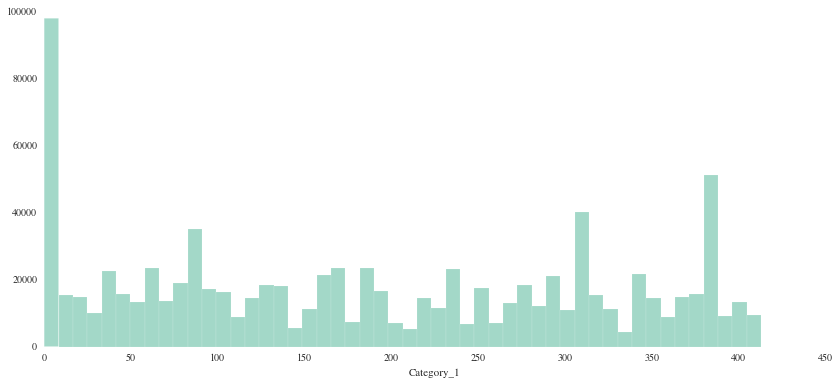

In [93]:
sns.distplot(train["Category_1"].dropna(),bins=50,kde=False)

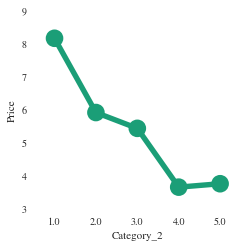

In [94]:
sns.factorplot('Category_2','Price',data=train)

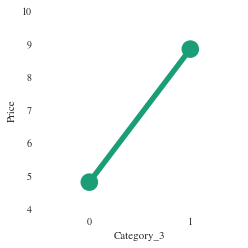

In [95]:
sns.factorplot('Category_3','Price',data=train)

Axes(0.125,0.125;0.775x0.775)


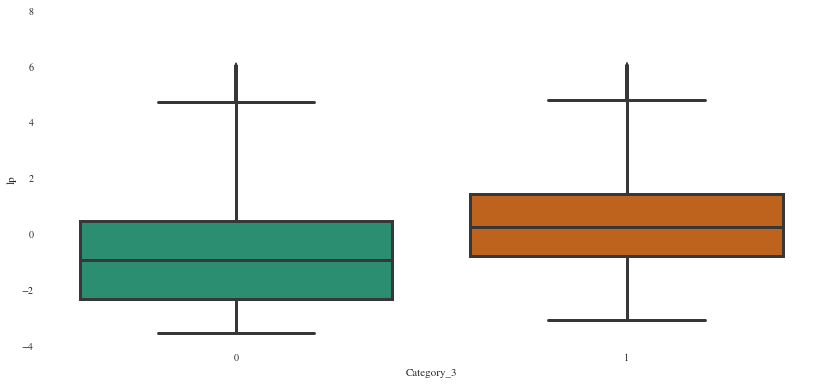

In [101]:
print(sns.boxplot(y='lp',x='Category_3',data=train))

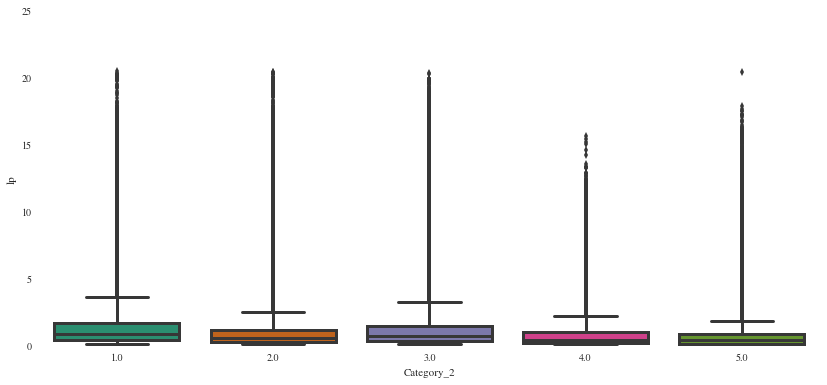

In [120]:
train['lp'] =np.sqrt(train['Price'])
sns.boxplot(y='lp',x='Category_2',data=train)

In [106]:
traind = pd.read_csv('train.csv', parse_dates=True)
traind['Date'] = pd.to_datetime(traind['Datetime'])
traind['Year'] = traind['Date'].dt.year


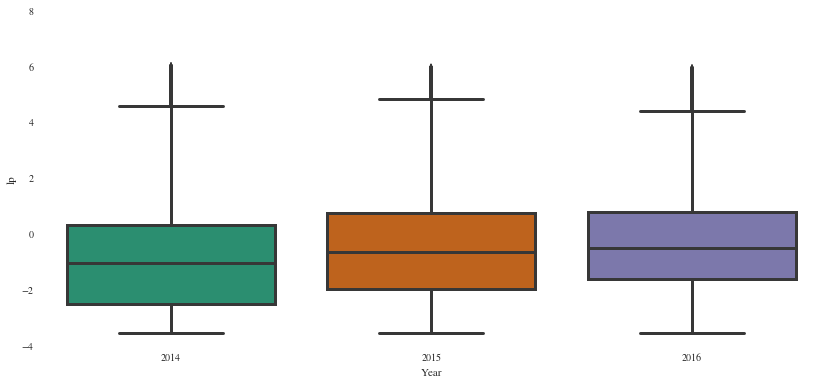

In [121]:
traind['lp'] =np.log(traind['Price'])
sns.boxplot(y='lp',x='Year',data=traind)

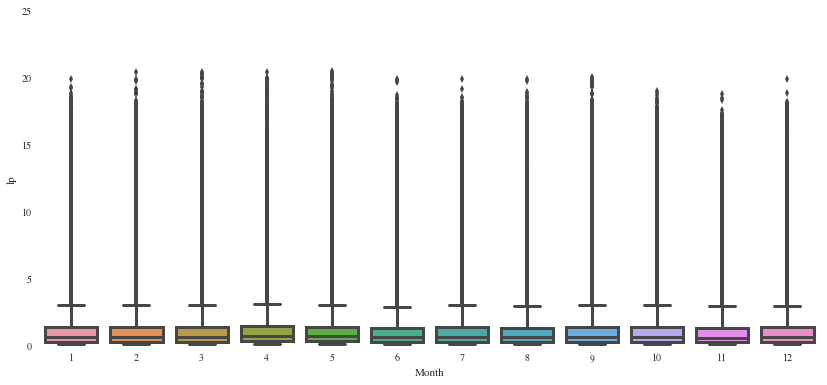

In [122]:
sns.boxplot(y='lp',x='Month',data=train)

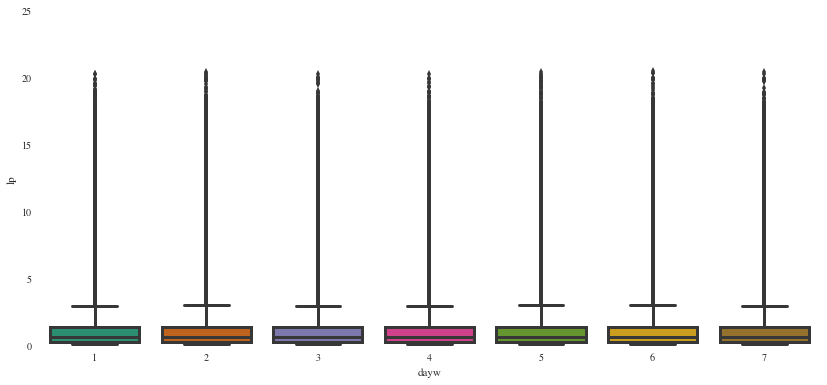

In [124]:
sns.boxplot(y='lp',x='dayw',data=train)

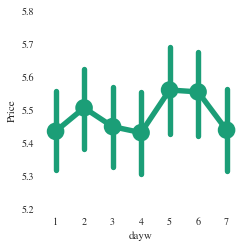

In [125]:
sns.factorplot('dayw','Price',data=train)

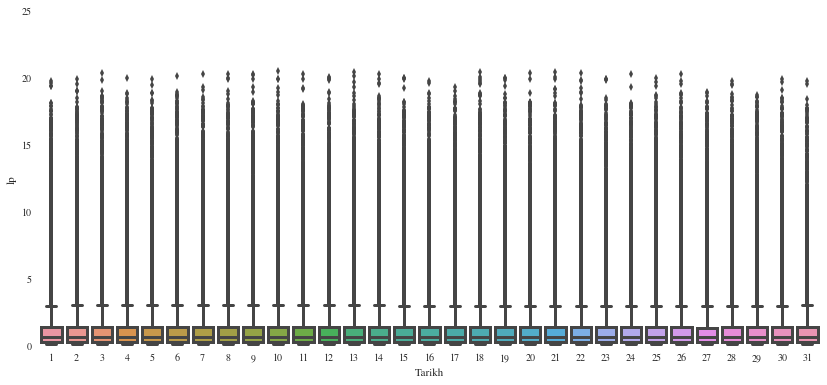

In [129]:
sns.boxplot(y='lp',x='Tarikh',data=train)

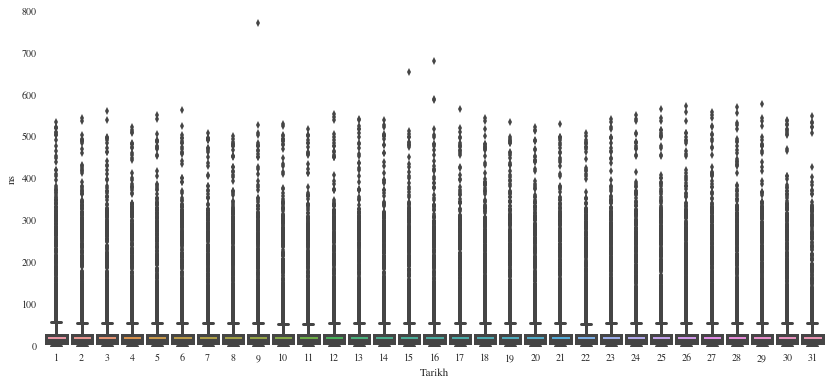

In [132]:
train['ns'] =np.sqrt(train['Number_Of_Sales'])
sns.boxplot(y='ns',x='Tarikh',data=train)

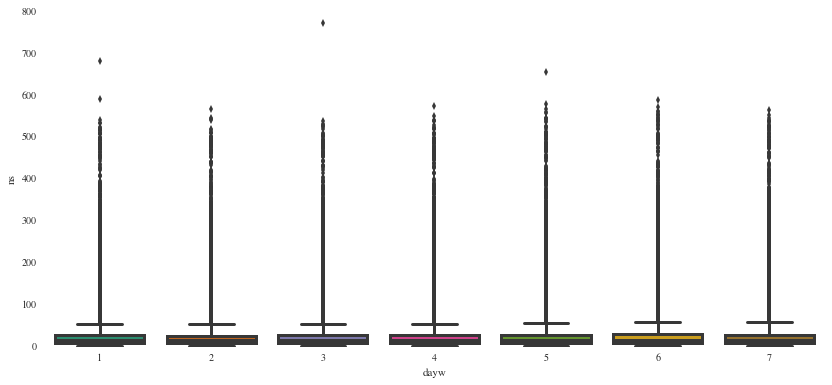

In [133]:
sns.boxplot(y='ns',x='dayw',data=train)

In [139]:
data = train[['Number_Of_Sales','Category_1']]
correlation = data.corr(method='pearson')

In [140]:
correlation

,Number_Of_Sales,Category_1
Number_Of_Sales,1.000000,-0.094855
Category_1,-0.094855,1.000000
